In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobiles-and-laptop-sales-data/mobile_sales_data.csv


In [2]:
#load the dataset
original_df = pd.read_csv("/kaggle/input/mobiles-and-laptop-sales-data/mobile_sales_data.csv")

#load the first five rows
original_df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


# Key features in the dataset

##### 1. PRODUCT INFORMATION
- **Product**: Type of product (Mobile Phone / Laptop).
- **Brand**: Various brands like Apple, Samsung, Dell, Lenovo, OnePlus, etc.
- **Product Code**: Unique identifier for each product.
- **Product Specification**: Brief description of the product features.

##### 2. SALES AND PRICING DATA
- **Price**: Cost of the product (randomly generated).
- **Inward Date**: Date when the product was received in stock.
- **Dispatch Date**: Date when the product was sold/dispatched
- **Quantity Sold**: Number of units sold per transaction.

##### 3. CUSTOMER LOCATION AND DETAILS
- **Customer Name**: Randomly generated customer names.
- **Customer Location**: City of the customer.
- **Region**: Sales region (North, South, East, West, Central).

##### 4. TECHNICAL SPECIFICATIONS
- **Core Specification (For Laptops)**: Includes processor models like i3, i5, i7, i9, Ryzen 3-9.
- **Processor Specification (For Mobiles)**: Includes processors like Snapdragon, Exynos, Apple A-Series, and MediaTek Dimensity.
- **RAM**: Randomly assigned memory sizes (4GB to 32GB).
- **ROM**: Storage capacity (64GB to 1TB).
- **SSD (For Laptops)**: Additional storage (256GB to 2TB), "N/A" for mobile phones.

# Exploratory Data Analysis

### Check the shape of the data

In [3]:
original_df.shape

(50000, 16)

There are 50,000 rows and 16 columns

### Check the information of the dataset (hels to know about both the data type and the possibility of missing data in the columns)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

1. There seems to be missing data in the **Core Specification** and **SSD** columns and both warrant further investigation.
2. The **Inward Date** and **Dispatch Date** columns need to be converted to *datetime* data types as they represent dates in a year

## Check for Duplicates in the dataset

In [5]:
duplicates = original_df.duplicated().sum()
print(f"There are {duplicates} duplicate(s) in the dataset.")

There are 0 duplicate(s) in the dataset.


## Missing data check

As stated earlier, we know that there is data missing in the **Core Specification** and **SSD** fields. Now we know that the dataset involves two products, namely mobile phones and laptops. We can filter between the two to determine which fields/columns have the missing data

In [6]:
# first lets determine the total sum of each
original_df['Product'].value_counts(dropna=False)

Product
Laptop          25017
Mobile Phone    24983
Name: count, dtype: int64

So we have 25,017 laptops and 24,893 mobile phones. Next we will add a filter to determine the which between the two have missing data.

In [7]:
# create a dataframe that only has laptop data 
laptop_df = original_df[original_df['Product']=='Laptop']
laptop_df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB
5,Laptop,HP,10A5C53D,Recognize happen middle clear simple player po...,190474,2025-03-19,2025-05-08,1,Monica Berry,West Heather,Central,i7,i7,16GB,64GB,256GB
7,Laptop,Apple,D58FF785,Reality sea weight thing newspaper good next g...,15041,2023-10-29,2023-12-20,1,Danielle Smith,North Travis,South,i7,i7,12GB,128GB,256GB


In [8]:
# now we create a dataframe that only has mobile phone data
phone_df = original_df[original_df['Product']=='Mobile Phone']
phone_df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
6,Mobile Phone,Dell,14932CAE,Could before almost wind couple evening perfor...,11670,2023-10-10,2023-10-16,6,Nicole Gonzalez,South Miguel,North,NaN,Apple A-Series,16GB,256GB,NaN
9,Mobile Phone,Motorola,E3CF42BE,Responsibility form left final suffer party pi...,174698,2025-02-09,2025-03-20,10,Miranda Clayton,North Deanna,North,NaN,MediaTek Dimensity,6GB,64GB,NaN
10,Mobile Phone,Apple,F54013D6,To say system loss near him.,51251,2023-04-03,2023-04-19,9,Ms. Katie Anderson,Lake Laurenfort,North,NaN,Snapdragon 8 Gen,4GB,256GB,NaN


#### Now we determine which between the two new dataframe which possesses missing data

In [9]:
#isolate the Core Specification and SSD columns in the laptop_df and check for the number of missing values in them
laptop_missing_values = laptop_df[['Core Specification', 'SSD']]
laptop_missing_values.isnull().sum()

Core Specification    0
SSD                   0
dtype: int64

In [10]:
#isolate the COre Specification and SSD columns in the phone_df and check for the number of missing values in them
phone_missing_values = phone_df[['Core Specification', 'SSD']]
phone_missing_values.isnull().sum()

Core Specification    24983
SSD                   24983
dtype: int64

We can confirm that the missing data lies in the rows that possess the Mobile Phones and that they are 24,983 in total. We can surmise that the cause of this is because:
1. Mobile phone storage cannot be classified as SSD as these are storage units used mostly in computers and laptops.
2. Core Specification represent the Central Processing Unit (CPU) models and CPUs are mostly used in Laptops and computers to power the device.
3. So it is safe to assume that the Processor Specification column represents the chips that are used to power the mobile phones.
4. In this dataset, it also seems likely that the Processor Specification has been used broadly to also show the processor in a laptop.

#### Solution for the missing data
It will be best to replace the missing values with the term **"N/A"**" to show that the value is not available in that column. It will be good to also add a keyword like **phone** to show that the reason their is a missing value is because the device is a phone and it may not have said components

In [11]:
#go back to the original dataframe and fill the missing rows in the columns Core Specification and SSD with N/A
# it would be best to call the new dataframe original_df1 so that the original_df we created first is our backup

original_df1 = original_df.fillna("N/A(Phone)")
original_df1

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,N/A(Phone),Snapdragon 7 Gen,12GB,128GB,N/A(Phone)
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,N/A(Phone),MediaTek Dimensity,8GB,256GB,N/A(Phone)
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Laptop,Motorola,8C187637,Pick build kind teach mean each camera.,170385,2024-03-02,2024-04-11,6,Sara Gomez,Sylviatown,North,i3,i3,16GB,512GB,2TB
49996,Laptop,HP,0DA9E4D3,Outside policy treat he opportunity pattern.,193133,2025-01-19,2025-01-20,4,Raymond Clark,Chrismouth,West,i7,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,CAD89A93,Test floor tax together out adult discover own...,66502,2024-01-16,2024-03-05,6,Joseph Martin,Huntfurt,North,i5,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,78566C17,Away also magazine receive such lay.,158883,2023-05-15,2023-05-25,2,Gabrielle Barnett,Heidiberg,North,N/A(Phone),Snapdragon 7s,12GB,1TB,N/A(Phone)


In [12]:
#check for missing values now in the new dataset
original_df1.isnull().sum()

Product                    0
Brand                      0
Product Code               0
Product Specification      0
Price                      0
Inward Date                0
Dispatch Date              0
Quantity Sold              0
Customer Name              0
Customer Location          0
Region                     0
Core Specification         0
Processor Specification    0
RAM                        0
ROM                        0
SSD                        0
dtype: int64

There are no more rows with no entries in the dataset

## Converting the Inward Date and Dispatch Date columns to datetime objects

In [13]:
original_df1['Inward Date'] = pd.to_datetime(original_df1['Inward Date'])
original_df1['Dispatch Date'] = pd.to_datetime(original_df1['Dispatch Date'])

original_df1.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,N/A(Phone),Snapdragon 7 Gen,12GB,128GB,N/A(Phone)
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,N/A(Phone),MediaTek Dimensity,8GB,256GB,N/A(Phone)
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [14]:
#check the data type to confirm the conversion
original_df1.dtypes

Product                            object
Brand                              object
Product Code                       object
Product Specification              object
Price                               int64
Inward Date                datetime64[ns]
Dispatch Date              datetime64[ns]
Quantity Sold                       int64
Customer Name                      object
Customer Location                  object
Region                             object
Core Specification                 object
Processor Specification            object
RAM                                object
ROM                                object
SSD                                object
dtype: object

## New columns for indepth analysis

### 1. Number of days in which a good was in stock (Dispatch date - Inward Date). We will refer to the new column as **"stock duration"**

In [15]:
original_df1['stock duration'] = (original_df1['Dispatch Date'] - original_df1['Inward Date']).dt.days
original_df1.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD,stock duration
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,N/A(Phone),Snapdragon 7 Gen,12GB,128GB,N/A(Phone),1
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB,3
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,N/A(Phone),MediaTek Dimensity,8GB,256GB,N/A(Phone),1
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB,50
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB,31


#### 2. **"Revenue collected"** to show the total amount collected (**Price** x **Quantity Sold**)

In [16]:
original_df1['revenue collected'] = original_df1['Price'] * original_df1['Quantity Sold']
original_df1.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD,stock duration,revenue collected
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,N/A(Phone),Snapdragon 7 Gen,12GB,128GB,N/A(Phone),1,471420
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB,3,44613
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,N/A(Phone),MediaTek Dimensity,8GB,256GB,N/A(Phone),1,799130
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB,50,20911
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB,31,279328


In [17]:
# check the data type
original_df1.dtypes

Product                            object
Brand                              object
Product Code                       object
Product Specification              object
Price                               int64
Inward Date                datetime64[ns]
Dispatch Date              datetime64[ns]
Quantity Sold                       int64
Customer Name                      object
Customer Location                  object
Region                             object
Core Specification                 object
Processor Specification            object
RAM                                object
ROM                                object
SSD                                object
stock duration                      int64
revenue collected                   int64
dtype: object

#### convert all the column names to lowercase for convenience

In [18]:
original_df1.columns = original_df1.columns.str.lower()
original_df1.columns

Index(['product', 'brand', 'product code', 'product specification', 'price',
       'inward date', 'dispatch date', 'quantity sold', 'customer name',
       'customer location', 'region', 'core specification',
       'processor specification', 'ram', 'rom', 'ssd', 'stock duration',
       'revenue collected'],
      dtype='object')

# Descriptive Statistics

#### First let us take a look at the columns with numerical data types

In [19]:
original_df1.describe()

,price,inward date,dispatch date,quantity sold,stock duration,revenue collected
count,50000.000000,50000,50000,50000.00000,50000.00000,5.000000e+04
mean,102641.407080,2024-03-19 17:41:58.272000,2024-04-19 07:54:30.528000256,5.51378,30.59204,5.655816e+05
min,5008.000000,2023-03-21 00:00:00,2023-03-23 00:00:00,1.00000,1.00000,5.046000e+03
25%,53487.000000,2023-09-20 00:00:00,2023-10-20 00:00:00,3.00000,16.00000,1.842348e+05
50%,103072.000000,2024-03-19 00:00:00,2024-04-18 00:00:00,6.00000,31.00000,4.393300e+05
75%,151396.250000,2024-09-18 00:00:00,2024-10-19 00:00:00,8.00000,46.00000,8.462238e+05
max,199999.000000,2025-03-20 00:00:00,2025-05-18 00:00:00,10.00000,60.00000,1.998850e+06
std,56363.550361,NaN,NaN,2.88101,17.32270,4.578018e+05


### What it means
1. **Price** 
- the minimum price on a product was **5008**
- the maximum price on a product was *199,999*
- 25% of the products were priced below or at **53,487**
- 50% of the products were priced below or at **103,072**
- 75% of the products were priced below or at **151,396.25**


2. **Quantity Sold**
- the minimum quantity of product a sold is **1**
- the maximum quantity of a product sold is **10**
- 25% of the quantity sold was below or at **3 units**.
- 50% of the quantity sold was below or at **6 units**.
- 75% of the quantity sold was below or at **8 units**.
  


3. **Stock Duration**
- the minimum amount of days a product was in stock was **1 day**.
- the maximum amount of days a product was in stock was **60 days**.
- 25% of the products were in stock for less than or only **16 days**.
- 50% of the products were in stock for less than or only **31 days**.
- 75% of the products were in stock for less than or only **46 days**.

4. **Revenue Collected**
- the minimum amount of revenue collected was **5,046**.
- the maximum amount of revenue collected was **1,998,850**.
- 25% of the revenue collected was below or equal to **184,234.80**.
- 50% of the revenue collected was below or equal to **439,330**.
- 75% of the revenue collected was below or equal to **846,223.80**




#### Now we can observe the Categorical data

In [20]:
original_df1.describe(include= 'object')

,product,brand,product code,product specification,customer name,customer location,region,core specification,processor specification,ram,rom,ssd
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,20,50000,50000,40013,25147,5,9,15,6,5,5
top,Laptop,Google,88EB4558,Site candidate activity company there bit insi...,Michael Williams,South Michael,West,N/A(Phone),MediaTek Dimensity,4GB,256GB,N/A(Phone)
freq,25017,2598,1,1,22,54,10288,24983,3640,8417,10127,24983


**What it means**
1. The majority of products sold were **laptops**, specifically **25,017 units**.
2. The top brand was **Google** which had **2,598 units**
3. **Michael Willimas** was our top customer with him making **22 orders**
4. The majority of phones used **MediaTek Dimensity** with it appearing in **3,640 units**
5. Most of the products(mobile phones and laptops) used **4GB RAM** with it appearing in **8,417 units**


# Data Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## Sales Analysis

### 1.1 Which product sold the most units?

In [22]:
# group the quantity sold column with the product column
product_quantity = (
    original_df1['quantity sold'].groupby(original_df1['product'])
    .sum()
    .sort_values(ascending=False)
    .index
  
)
product_quantity

Index(['Laptop', 'Mobile Phone'], dtype='object', name='product')

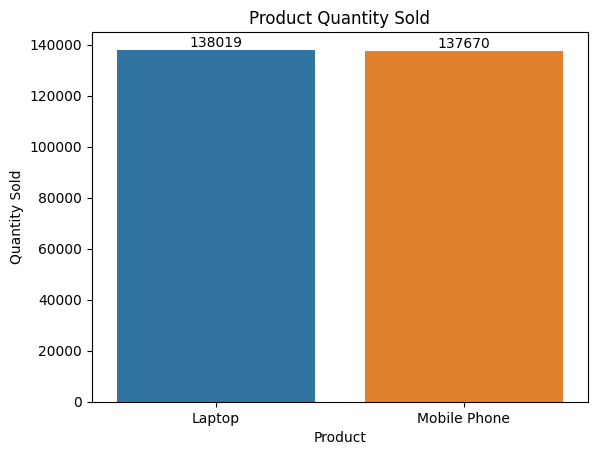

In [23]:
#visualize this with a bar chart
ax = sns.barplot(
    original_df1,
    x='product',
    y='quantity sold',
    order = product_quantity,
    estimator = sum,
    errorbar=None
)

plt.title("Product Quantity Sold")
plt.xlabel('Product')
plt.ylabel('Quantity Sold')


for container in ax.containers:
    ax.bar_label(container)


plt.show();

The total **laptops** units sold were **138,019** and the total **mobile phones** sold were **137,670** units. We can thus conclude that laptops sales exceeded mobile phones sales. 

### 1.2 What was the total sales revenue collected after product sales?

In [24]:
#group the revenue collected by product
product_revenue = (
    original_df1['revenue collected'].groupby(original_df1['product'])
    .sum()
    .sort_values(ascending=False)
    .index
  
)
product_revenue

Index(['Laptop', 'Mobile Phone'], dtype='object', name='product')

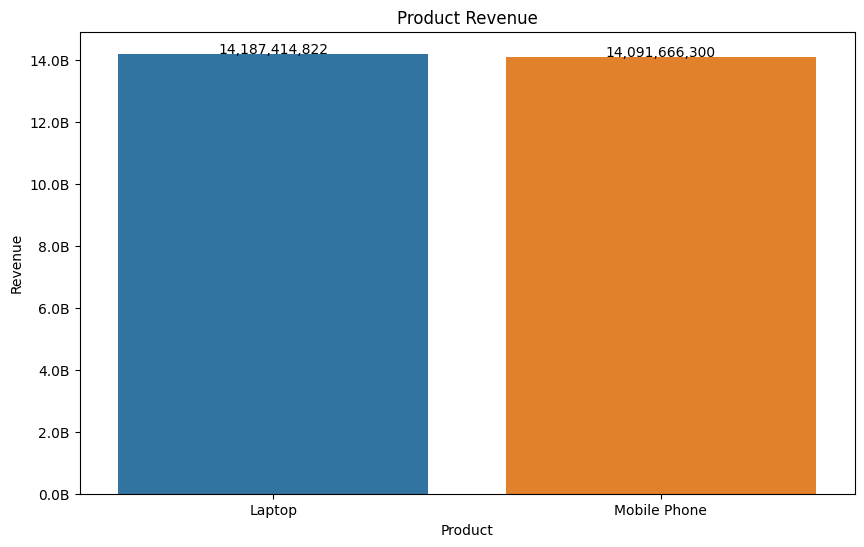

In [25]:
#use a barchart
plt.figure(figsize=(10, 6)) 

ax1 = sns.barplot(
    original_df1,
    x='product',
    y='revenue collected',
    order = product_revenue,
    estimator = sum,
    errorbar=None
)
plt.title("Product Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")

# Get total revenue per product
revenue_by_product = original_df1.groupby('product')['revenue collected'].sum()

for index, product in enumerate(product_revenue):
    revenue = revenue_by_product[product]
    ax1.text(
        index,
        revenue + 0.02 * max(original_df1['revenue collected']),
        f"{revenue:,.0f}",
        ha='center',
        fontsize=10
    )

from matplotlib.ticker import FuncFormatter

# Format y-axis as billions
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

plt.show()


The results show that **laptops** brought in **14,187,414,822** while **mobile phones** brought in **14,091,666,300**. We can thus conclude that laptops brought in more revenue.

### Laptops 

### 1.3 Which laptop brand brought in the most revenue?

In [26]:
# go back to the laptop df, and lets add the columns stock duration and revenue collected. Also put all of its column names in lower case
#first convert the Inward date and Dispatch date columns to datetime objects
laptop_df['Inward Date'] = pd.to_datetime(laptop_df['Inward Date'])
laptop_df['Dispatch Date'] = pd.to_datetime(laptop_df['Dispatch Date'])

#next add the new columns and convert the column names to lower case
laptop_df['stock duration'] = (laptop_df['Dispatch Date'] - laptop_df['Inward Date']).dt.days
laptop_df['revenue collected'] = laptop_df['Price'] * laptop_df['Quantity Sold']
laptop_df.columns = laptop_df.columns.str.lower()

#show the first five rows
laptop_df.head()

/tmp/ipykernel_92/1547189403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df['Inward Date'] = pd.to_datetime(laptop_df['Inward Date'])
/tmp/ipykernel_92/1547189403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df['Dispatch Date'] = pd.to_datetime(laptop_df['Dispatch Date'])
/tmp/ipykernel_92/1547189403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,product,brand,product code,product specification,price,inward date,dispatch date,quantity sold,customer name,customer location,region,core specification,processor specification,ram,rom,ssd,stock duration,revenue collected
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB,3,44613
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB,50,20911
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB,31,279328
5,Laptop,HP,10A5C53D,Recognize happen middle clear simple player po...,190474,2025-03-19,2025-05-08,1,Monica Berry,West Heather,Central,i7,i7,16GB,64GB,256GB,50,190474
7,Laptop,Apple,D58FF785,Reality sea weight thing newspaper good next g...,15041,2023-10-29,2023-12-20,1,Danielle Smith,North Travis,South,i7,i7,12GB,128GB,256GB,52,15041


In [27]:
laptop_revenue = (
    laptop_df['revenue collected'].groupby(laptop_df['product'])
    .sum()
    .sort_values(ascending=False)
    .index
  
)
laptop_revenue

Index(['Laptop'], dtype='object', name='product')

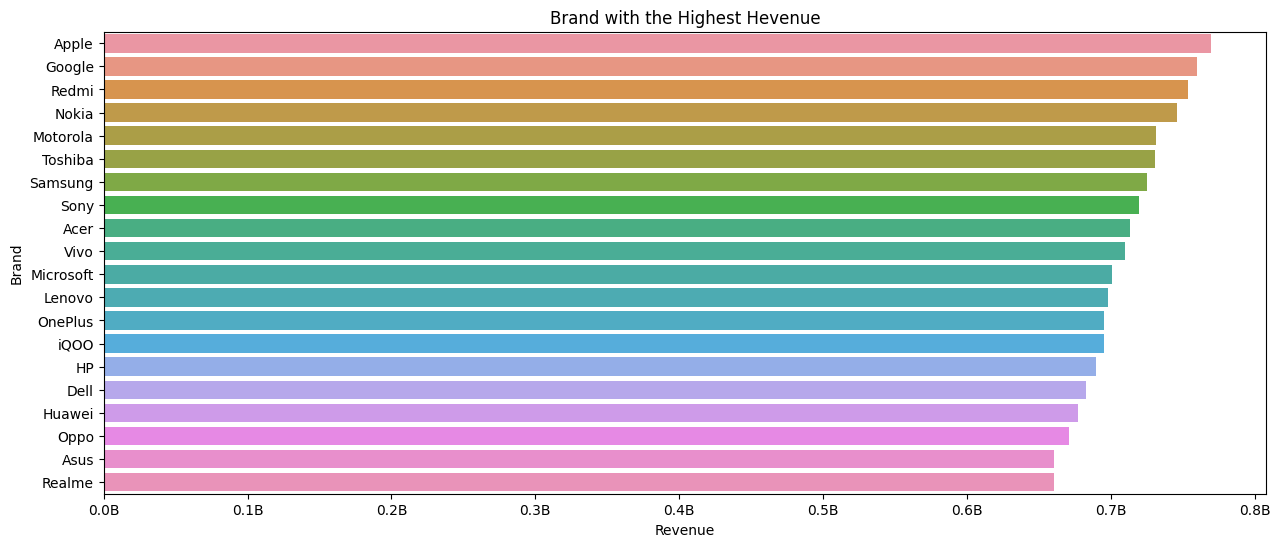

In [28]:
brand_order = (
    laptop_df.groupby('brand')['revenue collected']
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

#use a barchart
plt.figure(figsize=(15, 6)) 
ax1 = sns.barplot(x = 'revenue collected', y = 'brand', data = laptop_df, order= brand_order, estimator=sum, errorbar=None)
plt.title("Brand with the Highest Hevenue")
plt.xlabel("Revenue")
plt.ylabel("Brand")

#labelling purposes
for container in ax1.containers:
    ax.bar_label(container)

from matplotlib.ticker import FuncFormatter

# Format x-axis as billions
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

plt.show()


In [29]:
laptop_sales_pivot = pd.pivot_table(laptop_df, values = 'revenue collected', index = 'brand', columns = 'product', aggfunc='sum')

# Sort columns (brands) by their total revenue (descending)
laptop_pivot = laptop_sales_pivot_sorted = laptop_sales_pivot.loc[laptop_sales_pivot.sum(axis=1).sort_values(ascending=False).index]
laptop_pivot

product,Laptop
brand,
Apple,769426553
Google,759881710
Redmi,753319445
Nokia,745653860
Motorola,731315499
Toshiba,730396909
Samsung,725137297
Sony,719374669
Acer,713555022


From the results of our Pivot chart and the results of our horizontal Bar chart, we can spot that the **Apple Brand** brought in the most revenue with a total of **769426553**

### 1.4 Number of days each laptop brand was in stock

In [30]:
#find the average number of days each laptop brand was in stock
laptop_stock_average = (
    laptop_df.groupby('brand')['stock duration']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

laptop_stock_average

['Oppo',
 'Samsung',
 'Acer',
 'Huawei',
 'Lenovo',
 'Asus',
 'Redmi',
 'HP',
 'Vivo',
 'Nokia',
 'OnePlus',
 'Motorola',
 'Apple',
 'Microsoft',
 'Toshiba',
 'iQOO',
 'Realme',
 'Sony',
 'Dell',
 'Google']

In [31]:
laptop_stock_duration_pivot = pd.pivot_table(laptop_df, values = 'stock duration', index = 'brand', columns = 'product', aggfunc='mean')

# Sort columns (brands) by their total revenue (descending)
laptop_stock_pivot = laptop_stock_duration_pivot_sorted = laptop_stock_duration_pivot.loc[laptop_stock_duration_pivot.mean(axis=1).sort_values(ascending=False).index]
laptop_stock_pivot

product,Laptop
brand,
Oppo,31.261157
Samsung,31.212308
Acer,31.063281
Huawei,31.052196
Lenovo,31.031933
Asus,31.018062
Redmi,30.961808
HP,30.898599
Vivo,30.808274


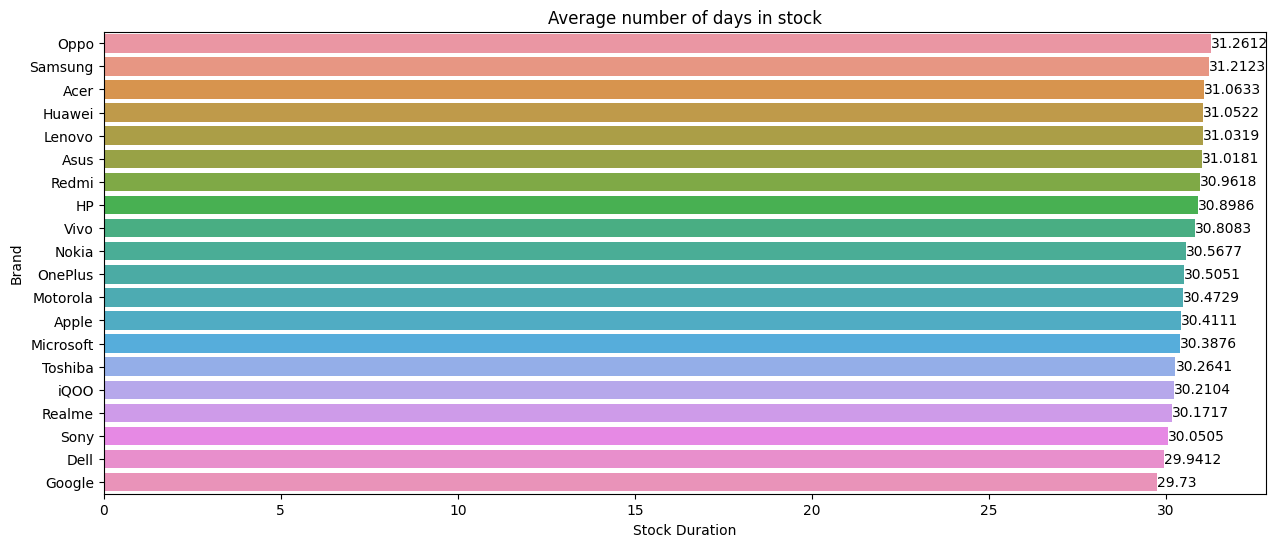

In [32]:
#build a bar chart to represent the results

#use a barchart
plt.figure(figsize=(15, 6)) 
ax2 = sns.barplot(x = 'stock duration', y = 'brand', data = laptop_df, order= laptop_stock_average, estimator=np.mean, errorbar=None)
plt.title("Average number of days in stock")
plt.xlabel("Stock Duration")
plt.ylabel("Brand")

#labelling purposes
for container in ax2.containers:
    ax2.bar_label(container)

The **average** number of days the **laptop** stayed in stock was a period of **30 days** with the **Oppo** brand having the longest period — **31.26** days and the **Google** brand having the shortest period — **29.73 days**.

### 1.5 Which Core Specification was in stock in high quantities?

In [33]:
#first get a descriptive statistic of the laptop_df
laptop_df.describe(include= 'object')

,product,brand,product code,product specification,customer name,customer location,region,core specification,processor specification,ram,rom,ssd
count,25017,25017,25017,25017,25017,25017,25017,25017,25017,25017,25017,25017
unique,1,20,25017,25017,21860,15647,5,8,8,6,5,4
top,Laptop,Apple,416DFEEB,Beat put care fight affect address his.,John Smith,South Michael,West,i5,i5,32GB,128GB,256GB
freq,25017,1333,1,1,15,26,5189,3215,3215,4236,5046,6301


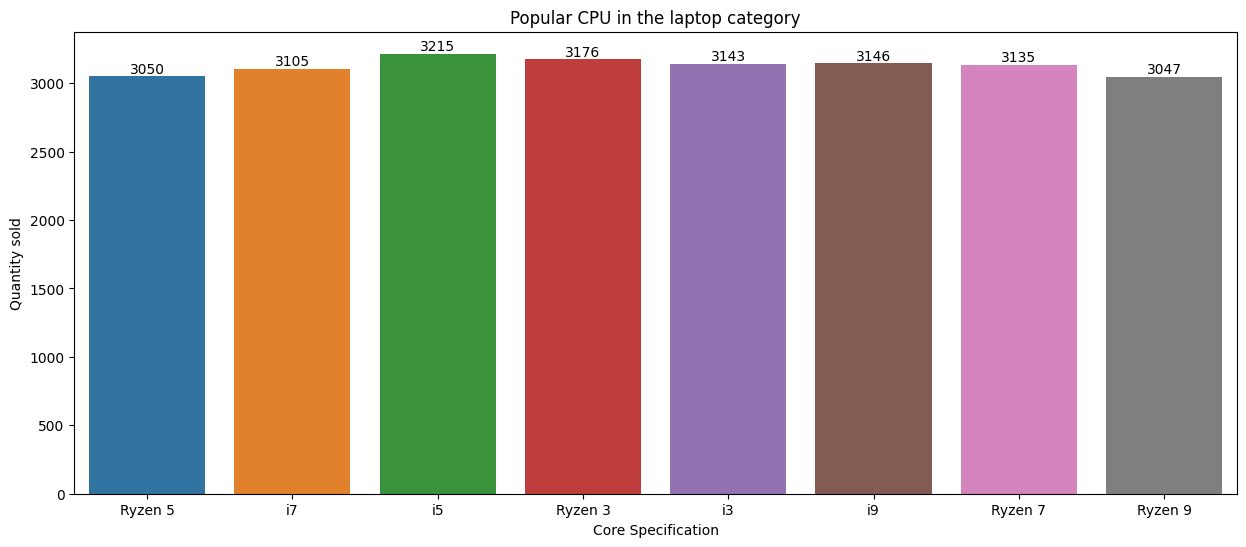

In [34]:
#build a countplot
plt.figure(figsize=(15, 6)) 
ax5 = sns.countplot(x = 'core specification', data = laptop_df)
plt.title("Popular CPU in the laptop category")
plt.xlabel("Core Specification")
plt.ylabel("Quantity sold")

#labelling purposes
for container in ax5.containers:
    ax5.bar_label(container)

Laptops which possessed the **i5 Core Specification** were in stock in high quantities as based on our results **3215** units were in stock.

### Mobile Phones

In [35]:
#filter the original_df1 and obtain rows with the mobile phones values.
mobile_phone_df = original_df1[original_df1['product']=='Mobile Phone']
mobile_phone_df.head()

,product,brand,product code,product specification,price,inward date,dispatch date,quantity sold,customer name,customer location,region,core specification,processor specification,ram,rom,ssd,stock duration,revenue collected
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,N/A(Phone),Snapdragon 7 Gen,12GB,128GB,N/A(Phone),1,471420
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,N/A(Phone),MediaTek Dimensity,8GB,256GB,N/A(Phone),1,799130
6,Mobile Phone,Dell,14932CAE,Could before almost wind couple evening perfor...,11670,2023-10-10,2023-10-16,6,Nicole Gonzalez,South Miguel,North,N/A(Phone),Apple A-Series,16GB,256GB,N/A(Phone),6,70020
9,Mobile Phone,Motorola,E3CF42BE,Responsibility form left final suffer party pi...,174698,2025-02-09,2025-03-20,10,Miranda Clayton,North Deanna,North,N/A(Phone),MediaTek Dimensity,6GB,64GB,N/A(Phone),39,1746980
10,Mobile Phone,Apple,F54013D6,To say system loss near him.,51251,2023-04-03,2023-04-19,9,Ms. Katie Anderson,Lake Laurenfort,North,N/A(Phone),Snapdragon 8 Gen,4GB,256GB,N/A(Phone),16,461259


### 1.6 Which Mobile Phone brand brought in the most revenue?

In [36]:
phone_sales_pivot = pd.pivot_table(mobile_phone_df, values = 'revenue collected', index = 'brand', columns = 'product', aggfunc='sum')

# Sort columns (brands) by their total revenue (descending)
phone_sales_pivot = phone_sales_pivot_sorted = phone_sales_pivot.loc[phone_sales_pivot.sum(axis=1).sort_values(ascending=False).index]
phone_sales_pivot

product,Mobile Phone
brand,
Google,754735374
Huawei,730904622
Microsoft,729609709
Nokia,727513265
Toshiba,724188926
Sony,723207682
Samsung,711583981
iQOO,710105057
OnePlus,707759119


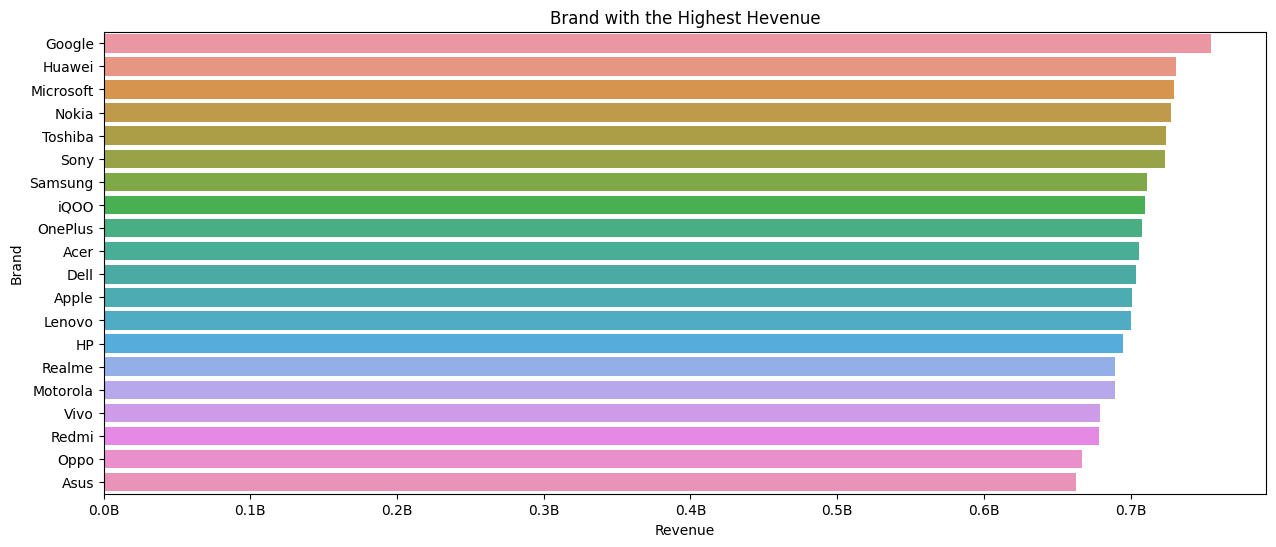

In [37]:
phone_brand_order = (
    mobile_phone_df.groupby('brand')['revenue collected']
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

#use a barchart
plt.figure(figsize=(15, 6)) 
ax8 = sns.barplot(x = 'revenue collected', y = 'brand', data = mobile_phone_df, order= phone_brand_order, estimator=sum, errorbar=None)
plt.title("Brand with the Highest Hevenue")
plt.xlabel("Revenue")
plt.ylabel("Brand")


from matplotlib.ticker import FuncFormatter

# Format x-axis as billions
ax8.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

plt.show()


Based on the results, the **Google** mobile phone brand brought in the most revenue of **754735374**.

### 1.7 Number of days each mobile phone brand was in stock

In [38]:
#find the average number of days each mobile phone brand was in stock
phone_stock_average = (
    mobile_phone_df.groupby('brand')['stock duration']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

phone_stock_average

['Samsung',
 'HP',
 'Dell',
 'Asus',
 'Vivo',
 'iQOO',
 'Google',
 'Realme',
 'Redmi',
 'Nokia',
 'Lenovo',
 'Oppo',
 'Motorola',
 'OnePlus',
 'Huawei',
 'Acer',
 'Toshiba',
 'Microsoft',
 'Apple',
 'Sony']

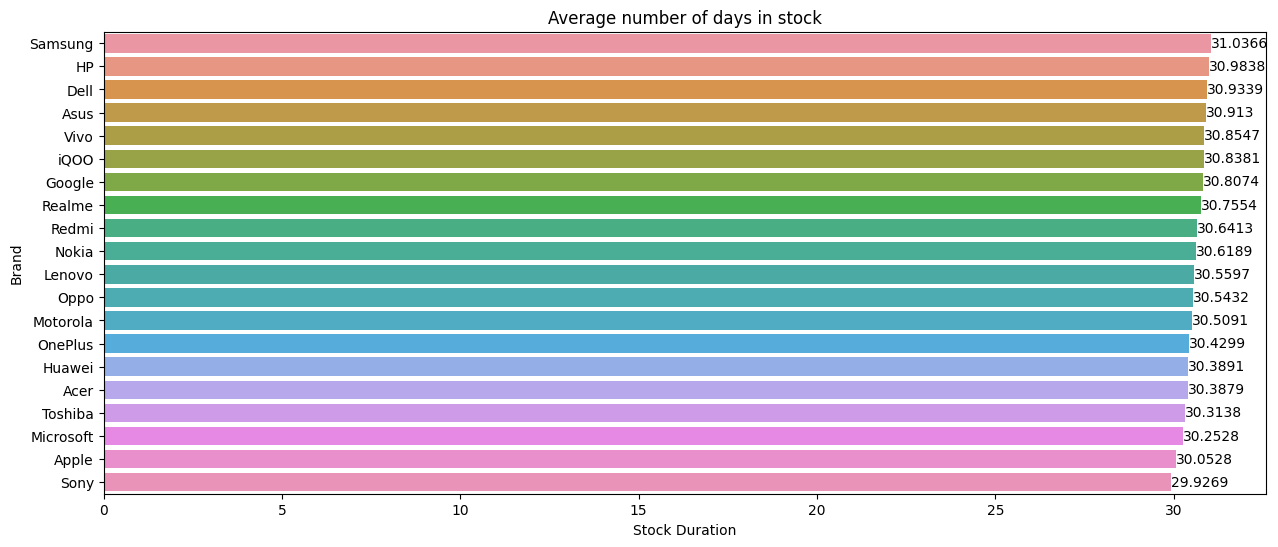

In [39]:
#build a bar chart to represent the results

#use a barchart
plt.figure(figsize=(15, 6)) 
ax2 = sns.barplot(x = 'stock duration', y = 'brand', data = mobile_phone_df, order= phone_stock_average, estimator=np.mean, errorbar=None)
plt.title("Average number of days in stock")
plt.xlabel("Stock Duration")
plt.ylabel("Brand")

#labelling purposes
for container in ax2.containers:
    ax2.bar_label(container)

In [40]:
#form a pivot chart to view the average number of days
phone_stock_duration_pivot = pd.pivot_table(mobile_phone_df, values = 'stock duration', index = 'brand', columns = 'product', aggfunc='mean')

# Sort columns (brands) by their total revenue (descending)
phone_stock_pivot = phone_stock_duration_pivot_sorted = phone_stock_duration_pivot.loc[phone_stock_duration_pivot.mean(axis=1).sort_values(ascending=False).index]
phone_stock_pivot

product,Mobile Phone
brand,
Samsung,31.036566
HP,30.983779
Dell,30.933939
Asus,30.912971
Vivo,30.854708
iQOO,30.838095
Google,30.807396
Realme,30.755426
Redmi,30.641252


Based on the results, the **Samsung** phone brand spends the most number of days in stock which is **31.037* days

### 1.8 Which Processor Specification was in stock in high quantities?

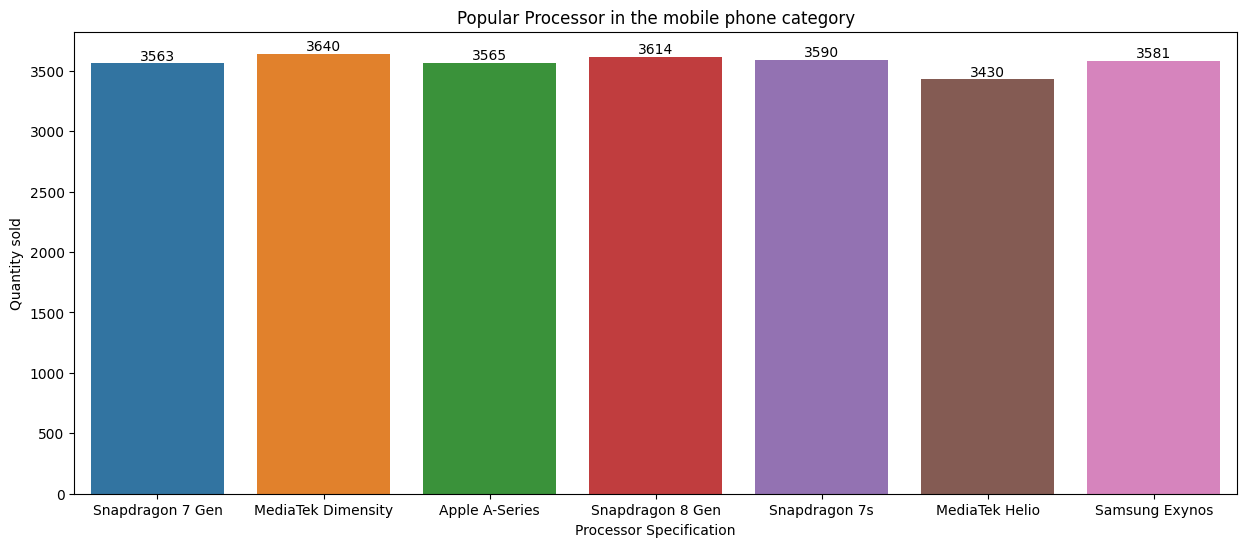

In [41]:
#build a countplot
plt.figure(figsize=(15, 6)) 
ax9 = sns.countplot(x = 'processor specification', data = mobile_phone_df)
plt.title("Popular Processor in the mobile phone category")
plt.xlabel("Processor Specification")
plt.ylabel("Quantity sold")

#labelling purposes
for container in ax9.containers:
    ax9.bar_label(container)

The mobile phones **MediaTek Dimensity** processor is the one in stock the most with **3640 units**.

### 1.9 What was the popular laptop brand in each region

In [42]:
# build a pivot chart to have a quick overview of the laptop quantity sales in each region
laptop_region_popularity = pd.pivot_table(
    data = laptop_df ,
    values = 'quantity sold',
    index = 'brand',
    columns = ['product', 'region'],
    aggfunc = sum
)
laptop_region_popularity    

/tmp/ipykernel_92/1126658408.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  laptop_region_popularity = pd.pivot_table(


product    Laptop                        
region    Central  East North South  West
brand                                    
Acer         1331  1566  1317  1359  1466
Apple        1216  1548  1467  1559  1653
Asus         1236  1248  1227  1471  1387
Dell         1291  1314  1301  1277  1415
Google       1375  1332  1535  1430  1558
HP           1372  1433  1289  1341  1282
Huawei       1294  1226  1402  1346  1376
Lenovo       1265  1330  1341  1441  1398
Microsoft    1162  1239  1364  1327  1597
Motorola     1408  1331  1534  1496  1431
Nokia        1385  1574  1364  1218  1569
OnePlus      1484  1503  1316  1198  1407
Oppo         1297  1277  1443  1261  1392
Realme       1122  1349  1388  1412  1208
Redmi        1294  1522  1336  1554  1483
Samsung      1432  1443  1420  1362  1459
Sony         1330  1353  1423  1522  1434
Toshiba      1474  1393  1389  1328  1360
Vivo         1429  1385  1423  1351  1319
iQOO         1350  1133  1432  1414  1401

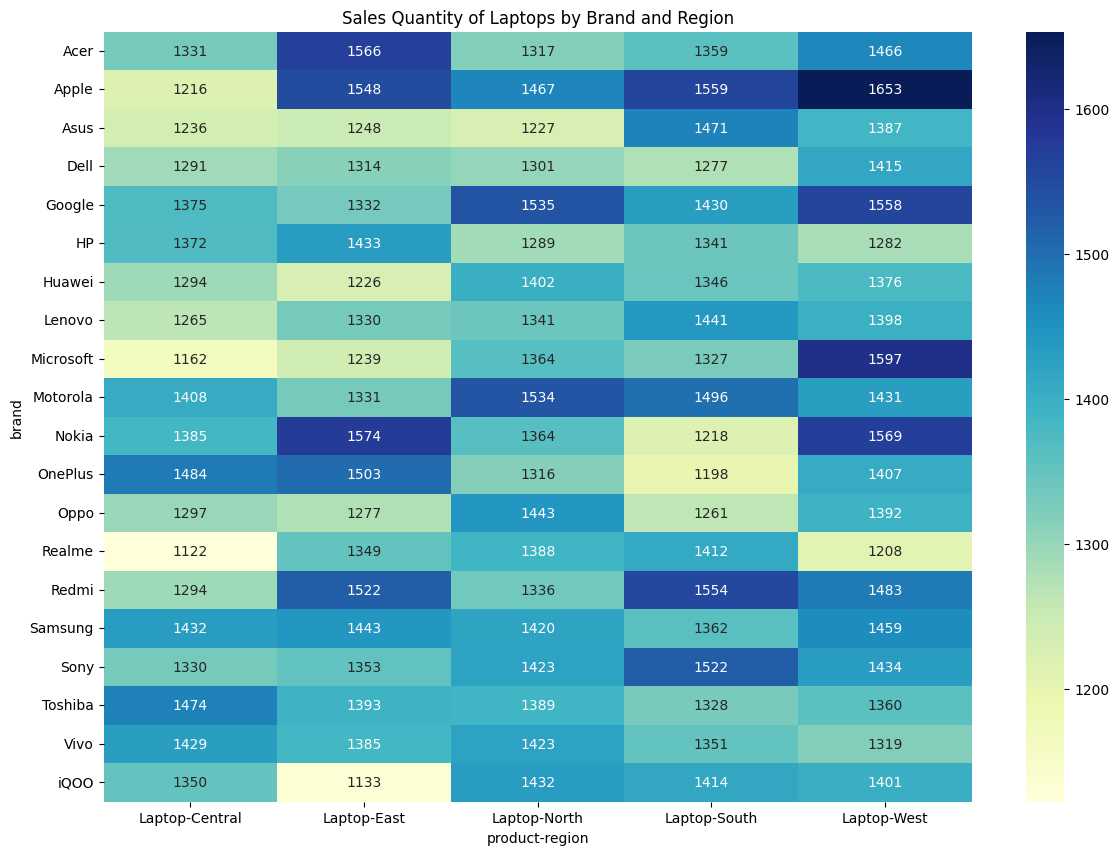

In [43]:
#create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(laptop_region_popularity, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Quantity of Laptops by Brand and Region")
plt.show()

Based on the results from the heatmap:
1. In the Central Region, the **OnePlus** laptop brand was sold in the highest quantities — **1484 units**.
2. In the East region, the **Nokia** laptop brand was sold in the highest quantities — **1574 units**.
3. In the North Region, the **Google** brand was sold in the highest quantities — **1535 units**
4. In the South Region, the **Apple** brand was sold in the highest quantites — **1559 units**.
5. In the West Region, the **Apple** brand was sold in the highest quantities — **1653 units**.

### 1.10 What was the popular mobile phone brand in each region?

In [44]:
#build a pivot table to have a quick overview of the mobile phone sales in each region
phone_region_popularity = pd.pivot_table(
    data = mobile_phone_df ,
    values = 'quantity sold',
    index = 'brand',
    columns = ['product', 'region'],
    aggfunc = sum
)
phone_region_popularity 

/tmp/ipykernel_92/2498125737.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  phone_region_popularity = pd.pivot_table(


product   Mobile Phone                        
region         Central  East North South  West
brand                                         
Acer              1345  1322  1462  1385  1301
Apple             1365  1181  1388  1374  1446
Asus              1230  1352  1251  1263  1334
Dell              1470  1189  1328  1445  1389
Google            1403  1466  1343  1496  1474
HP                1624  1391  1252  1281  1335
Huawei            1426  1464  1523  1373  1375
Lenovo            1265  1489  1446  1377  1371
Microsoft         1385  1259  1524  1393  1336
Motorola          1424  1341  1260  1236  1427
Nokia             1437  1418  1432  1340  1502
OnePlus           1420  1442  1339  1420  1351
Oppo              1295  1265  1275  1506  1378
Realme            1400  1428  1337  1235  1333
Redmi             1183  1348  1402  1354  1472
Samsung           1266  1445  1234  1433  1539
Sony              1505  1529  1377  1319  1251
Toshiba           1356  1359  1425  1487  1425
Vivo              1278  1284  1429  1510  1353
iQOO              1469  1274  1297  1320  1615

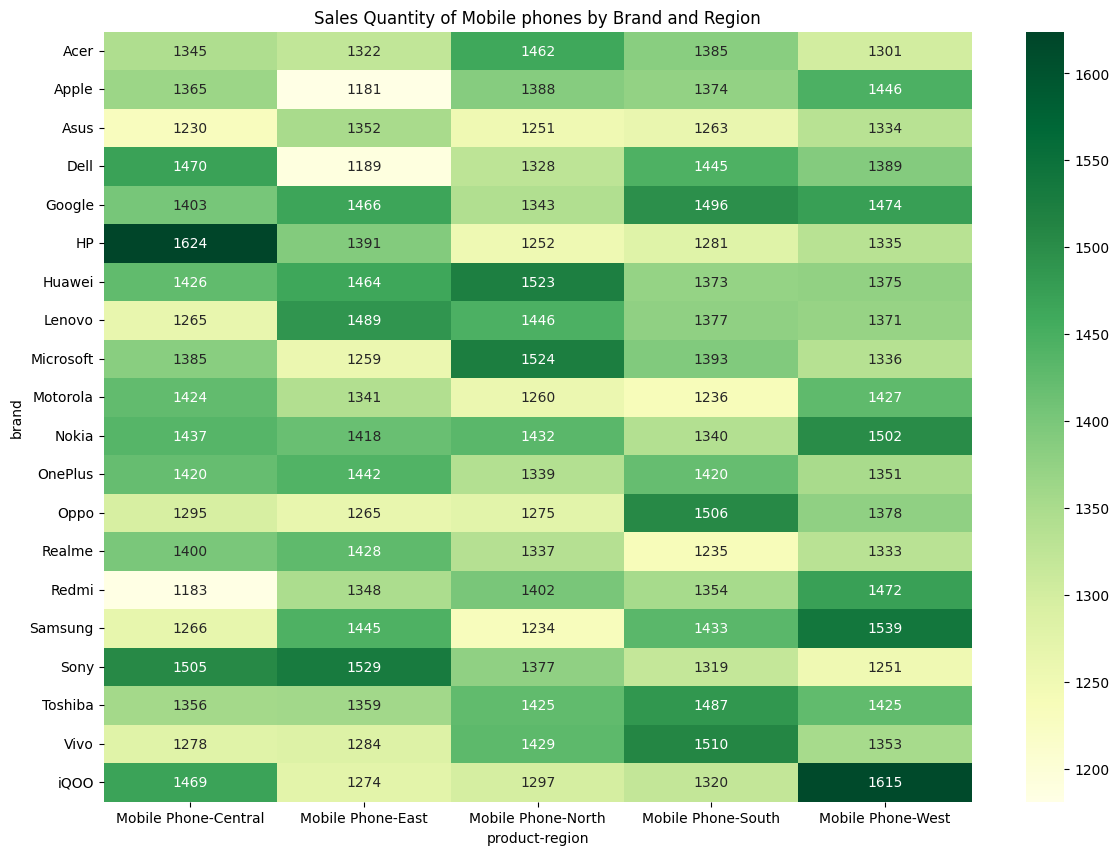

In [45]:
#create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(phone_region_popularity, annot=True, fmt=".0f", cmap="YlGn")
plt.title("Sales Quantity of Mobile phones by Brand and Region")
plt.show()

Based on the results from the heatmaps:
1. In the **Central** region, the **HP** mobile phone brand was sold in the highest quantities — **1624 units**.
2. In the **East** region, the **Sony** mobile phone brand was sold in the highest quantities — **1529 units**.
3. In the **North** region, the **Microsoft** mobile phone brand was sold in the highest quantites — **1524 units**.
4. In the **South** region, the **Vivo** mobile phone brand was sold in the highest quantities — **1510 units**.
5. In the **West** region, the **iQOO** mobile phone brand was sold in the highest quantities — **1615 units**.

### 1.11 Which laptop brand brought in the most revenue in each region?

In [52]:
# build a pivot chart to have a quick overview of the laptop revenue collectd in each region
laptop_region_revenue = pd.pivot_table(
    data = laptop_df ,
    values = 'revenue collected',
    index = 'brand',
    columns = ['product', 'region'],
    aggfunc = sum
)
laptop_region_revenue    

/tmp/ipykernel_92/2897641202.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  laptop_region_revenue = pd.pivot_table(


product       Laptop                                            
region       Central       East      North      South       West
brand                                                           
Acer       130983791  156157766  129892852  141399762  155120851
Apple      122828911  165323133  161200879  153659439  166414191
Asus       125528308  127199097  124025690  145421601  138562715
Dell       133034880  139036670  137341846  125056173  147916441
Google     141524432  141029992  153417577  154703372  169206337
HP         134464749  156118618  132613873  131236235  134895890
Huawei     134599346  125429304  139905894  137893110  139438274
Lenovo     134372156  129706995  133143154  153125467  147362273
Microsoft  126956604  129540288  139864501  140597040  163497135
Motorola   153836802  126312355  154442453  151280520  145443369
Nokia      151096263  161494160  147935317  125391980  159736140
OnePlus    151927190  148702584  125563361  122874211  146425426
Oppo       130697708  130894559  138473923  116526954  154543733
Realme     117118830  136105444  143571596  137729367  125795220
Redmi      137713982  155246190  140381459  163879926  156097888
Samsung    143832275  137224460  150022123  143221009  150837430
Sony       134739352  142006715  138758641  158600937  145269024
Toshiba    156223249  144669329  140597889  141627084  147279358
Vivo       144780400  140529662  152204186  130515164  141451325
iQOO       139799749  114709844  143806399  149852596  146870100

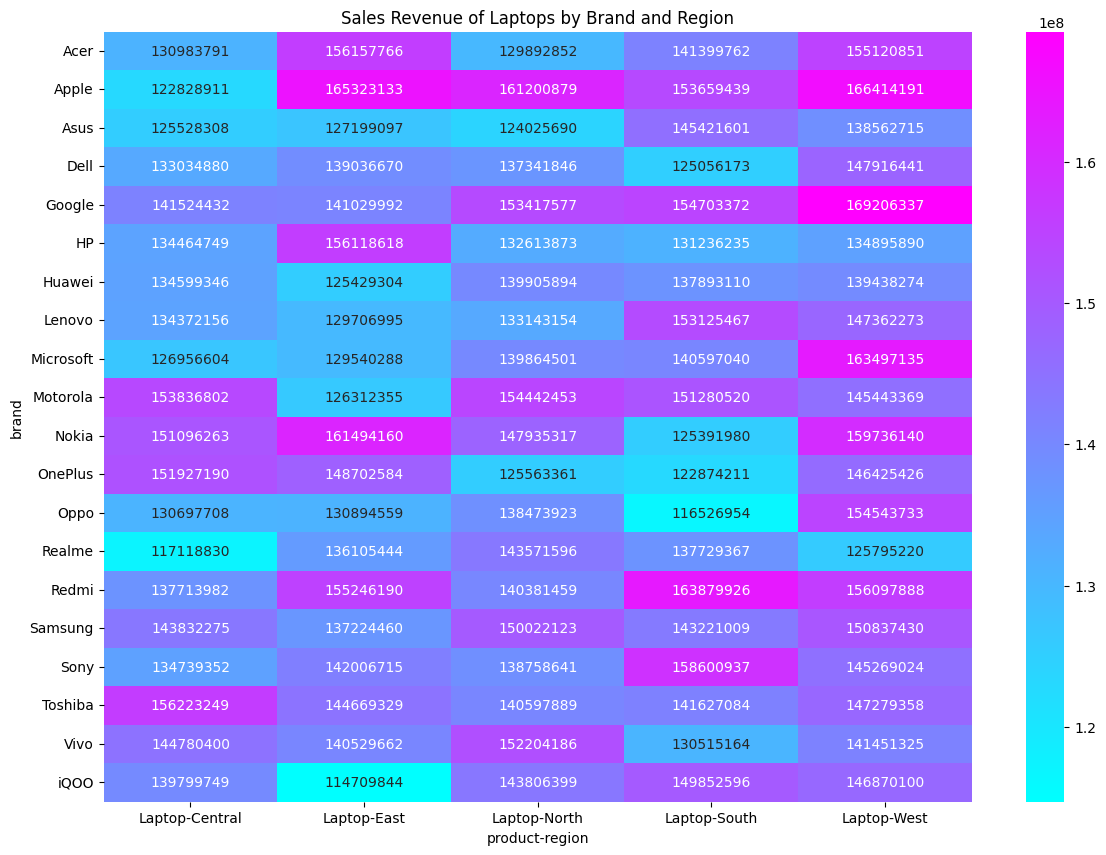

In [55]:
#create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(laptop_region_revenue, annot=True, fmt=".0f", cmap="cool")
plt.title("Sales Revenue of Laptops by Brand and Region")
plt.show()

Based on the results from the heatmap:
1. In the **Central** region, a high amount of revenue was brought in by the **Toshiba** brand — a total revenue of **156,223,249**.
2. In the **East** region, a high amount of revenue was brought in by the **Apple** brand — a total revenue of **165,323,133**.
3. In the **North** region, a high amount of revenue was brought in by the **Apple** brand — a total revenue of **161,200,879**.
4. In the **South** region, a high amount of revenue was brought in by the **Redmi** brand — a total revenue of **163,879,926**.
5. In the **West** region, a high amount of revenue was brought in by the **Google** brand — a total revenue of **169,206,337*.


#### 1.12 Which mobile phone brand brought in the most revenue in each region?

In [56]:
#build a pivot table to have a quick overview of the mobile phone sales in each region
phone_region_revenue = pd.pivot_table(
    data = mobile_phone_df ,
    values = 'revenue collected',
    index = 'brand',
    columns = ['product', 'region'],
    aggfunc = sum
)
phone_region_revenue

/tmp/ipykernel_92/2674598091.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  phone_region_revenue = pd.pivot_table(


product   Mobile Phone                                            
region         Central       East      North      South       West
brand                                                             
Acer         142533115  144673296  152788669  145671195  120349100
Apple        144080629  122028516  137779803  147055929  149871236
Asus         128916413  142934954  131539061  126064712  133659322
Dell         156891012  116785219  134012527  151712339  144015957
Google       141460217  161193294  145947883  150307942  155826038
HP           164950445  143434714  120640020  122924306  142649561
Huawei       151335794  150264390  152427949  136267650  140608839
Lenovo       133840343  141721125  140300207  140617527  144133513
Microsoft    145363703  132808604  156791161  149368105  145278136
Motorola     139042236  142599112  130937513  129589529  147094721
Nokia        150136864  140838564  148368709  130402338  157766790
OnePlus      150128499  140815355  140152873  139952235  136710157
Oppo         132398954  125309368  123723865  145718877  139537236
Realme       148272274  147315030  134095414  122379721  137298866
Redmi        118145423  133586077  136621273  138369532  152131239
Samsung      129639403  151106949  132594855  143478062  154764712
Sony         161530187  150780680  141000978  132513259  137382578
Toshiba      143277763  131694399  153238386  156925770  139052608
Vivo         127487363  135054273  135235508  150003157  131537239
iQOO         146135919  129927206  134854655  133955207  165232070

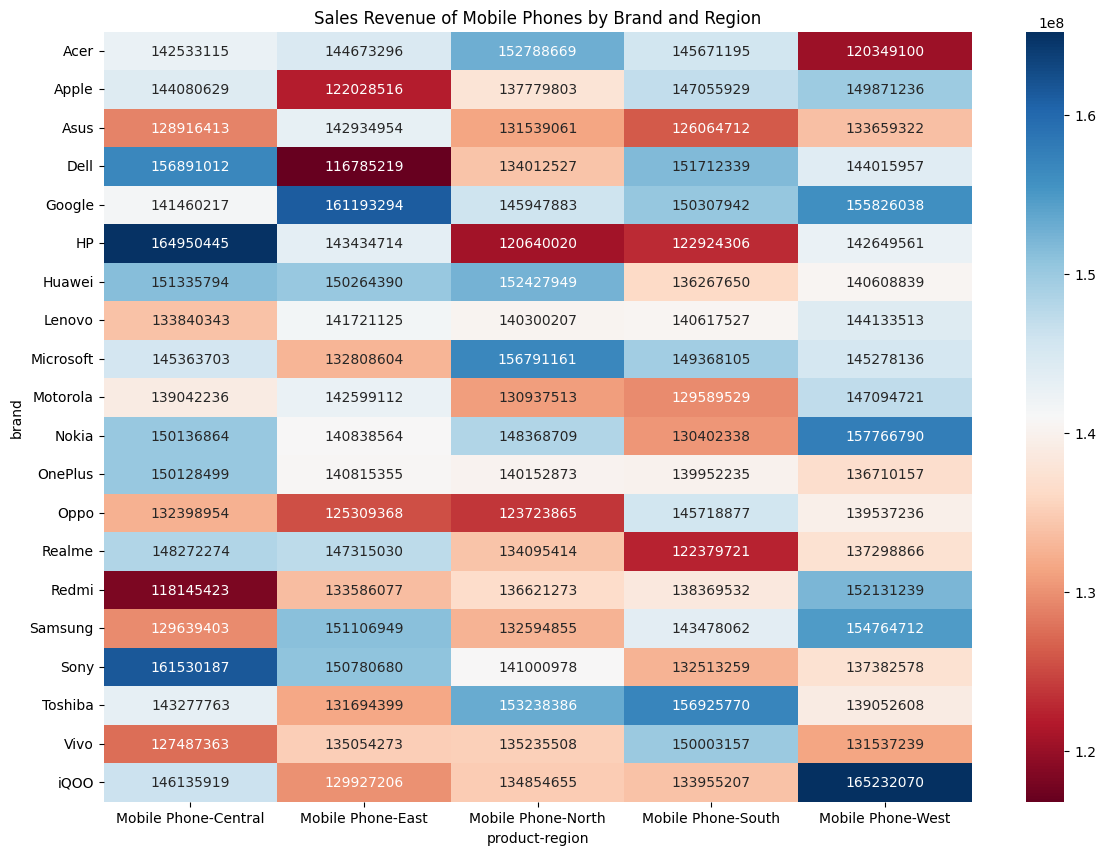

In [61]:
#create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(phone_region_revenue, annot=True, fmt=".0f", cmap="RdBu")
plt.title("Sales Revenue of Mobile Phones by Brand and Region")
plt.show()

Based on the results of the heatmap:
1. In the **Central** region, the **HP** mobile phone brand brought in the highest revenue — a total revenue of **164,950,445**
2. In the **East** region, the **Google** mobile phone brand brought in the highest revenue — a total revenue of **161,193,294**.
3. In the **North** region, the **Microsoft** mobile phone brand brought in the highest revenue — a total revenue of **156,791,161**.
4. In the **South** region, the **Toshiba** mobile phone brand brought in the highest revenue — a total revenue of **156,925,770**.
5. In the **West** region, the **iQOO** mobile phone brand brought in the highest revenue — a total revenue of **165,232,070**.